In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from scipy.optimize import minimize

Header of the CSV file:
Index(['X1+X2', 'P_NS(APR4_EPP)', 'P_NS(BHF_BBB2)', 'P_NS(H4)', 'P_NS(HQC18)',
       'P_NS(KDE0V)', 'P_NS(KDE0V1)', 'P_NS(MPA1)', 'P_NS(MS1_PP)',
       'P_NS(MS1B_PP)', 'P_NS(RS)', 'P_NS(SK255)', 'P_NS(SK272)', 'P_NS(SKI2)',
       'P_NS(SKI3)', 'P_NS(SKI4)', 'P_NS(SKI5)', 'P_NS(SKI6)', 'P_NS(SKMP)',
       'P_NS(SKOP)', 'P_NS(SLy)', 'P_NS(SLY2)', 'P_NS(SLY9)', 'P_NS(SLY230A)'],
      dtype='object')

In [8]:
def read_csv_file(filename):
    # Read the CSV file
    data = pd.read_csv(filename)
    return data


In [9]:
data=read_csv_file('/home/mberbel/Escritorio/MLpaper/fits/KNN_P_NS_given_X1pX2-num.csv')

# STUDY RF REGRESSION

In [68]:
def random_forest_regression(x, y, trees,crit):
    # Train the random forest regressor
    regressor = RandomForestRegressor(n_estimators=trees, criterion=crit, random_state=42)
    regressor.fit(x.reshape(-1, 1), y)

    # Define the objective function to minimize
    def objective(scaling_params):
        scaled_y = scaling_params[0] * regressor.predict(x.reshape(-1, 1))
        return np.sum((scaled_y - y) ** 2)

    # Define the constraint functions for x=0 and x=1
    def constraint_0(scaling_params):
        return scaling_params[0] * regressor.predict([[0.0]]) - 0.0

    def constraint_1(scaling_params):
        return scaling_params[0] * regressor.predict([[1.0]]) - 1.0

    # Initial guess for scaling parameter
    x0 = [1.0]

    # Define the optimization problem
    constraints = [{'type': 'eq', 'fun': constraint_0}, {'type': 'eq', 'fun': constraint_1}]
    result = minimize(objective, x0, method='SLSQP', constraints=constraints)

    # Obtain the optimized scaling parameter
    scaling_param = result.x[0]

    # Apply the regression model to the original X points with the scaling parameter
    y_smoothed = scaling_param * regressor.predict(x.reshape(-1, 1))
    print(regressor.score(x.reshape(-1, 1),y))

    return y_smoothed

In [69]:
smoothed_rf50 = random_forest_regression(x, y, 100, 'squared_error')
smoothed_rf100 = random_forest_regression(x, y, 100, 'absolute_error')
smoothed_rf150 = random_forest_regression(x, y, 100, 'friedman_mse')
smoothed_rf200 = random_forest_regression(x, y, 100, 'poisson')

0.9969166183471586
0.996851714742266
0.9969166183471586
0.9969124025068077


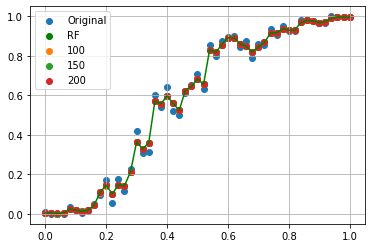

In [70]:
plt.scatter(x,y,label='Original')
plt.scatter(x, smoothed_rf50, label='RF',color='green')
plt.scatter(x, smoothed_rf100, label='100')
plt.scatter(x, smoothed_rf150, label='150')
plt.scatter(x, smoothed_rf200, label='200')
plt.plot(x, smoothed_rf, color='green')
plt.legend()
plt.grid()
plt.show()

Conclusion: default RF regressor is the best RF can give

In [90]:
BayesFactor=[1.526, 1.555, 0.056, 1.422, 1.177, 1.283, 0.276, 0.001, 0.009, 0.176, 0.179, 0.159, 0.108, 0.107, 0.33, 0.025, 0.288, 0.29, 0.618, 1.0, 1.028, 0.37, 0.932]
EOS = ["APR4_EPP", "BHF_BBB2", "H4", "HQC18", "KDE0V", "KDE0V1", "MPA1", "MS1_PP", "MS1B_PP", "RS", "SK255", "SK272", "SKI2", "SKI3", "SKI4", "SKI5", "SKI6", "SKMP", "SKOP", "SLy", "SLY2", "SLY9", "SLY230A"]


0.9969166183471586
P_NS(APR4_EPP) : at 0->  0.0055281199999999905 , at 1->  0.9970072500000002
0.9900867648863272
P_NS(BHF_BBB2) : at 0->  0.0057007699999999896 , at 1->  0.9543991200000019
0.9946537264733587
P_NS(H4) : at 0->  0.0062416699999999995 , at 1->  0.9938252600000012
0.9970715780988623
P_NS(HQC18) : at 0->  0.006551729999999994 , at 1->  0.9962672899999994
0.9902783122962371
P_NS(KDE0V) : at 0->  0.0058247999999999946 , at 1->  0.9693439199999996
0.9910332191424165
P_NS(KDE0V1) : at 0->  0.005977449999999991 , at 1->  0.9734674699999989
0.9964706412075631
P_NS(MPA1) : at 0->  0.0040131199999999985 , at 1->  0.996262239999998
0.9955639885296073
P_NS(MS1_PP) : at 0->  0.004704669999999998 , at 1->  0.9923716400000022
0.9945115562574706
P_NS(MS1B_PP) : at 0->  0.004702269999999998 , at 1->  0.9924570000000013
0.997217889433653
P_NS(RS) : at 0->  0.006038199999999991 , at 1->  0.9972407199999984
0.9971434322210454
P_NS(SK255) : at 0->  0.0055259699999999955 , at 1->  0.997003309

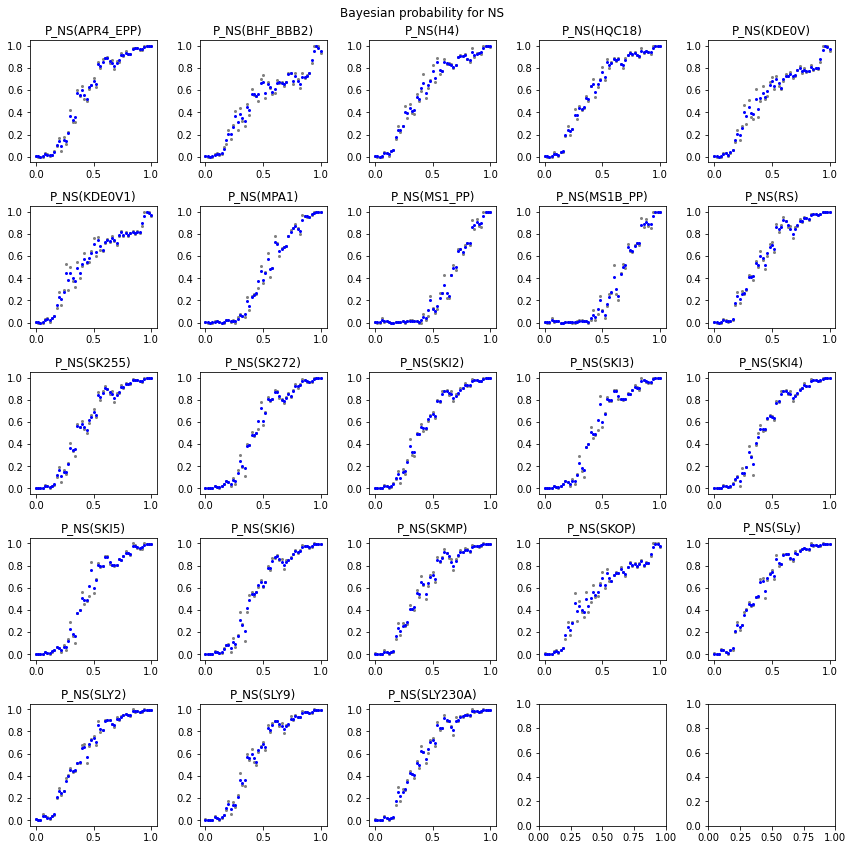

In [91]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(12,12))
i = 0; j = 0;
for k in range(1,24):
    y=data[data.columns[k]].values
    pred=random_forest_regression(x, y, 100, 'squared_error')
    print(data.columns[k], ": at 0-> ",pred[0], ", at 1-> ",pred[-1])
    axes[i,j].scatter(x, data[data.columns[k]].values, s=4, c='grey')
    axes[i,j].scatter(x, pred, s=4, c='blue')
    axes[i,j].set_title(data.columns[k])
    if(np.any((pred > 1) | (pred < 0))):
        printf("unphysical probability, ",data.columns[k])
    j = j + 1
    if (j > 4):
        j=0
        i=i+1
_=fig.suptitle("Bayesian probability for NS")
fig.tight_layout() 

KDE0V and KDE0V1 have low values at 1... But they are the only ones.

Weighted:

0.9969166183471586
0.9900867648863272
0.9946537264733587
0.9970715780988623
0.9902783122962371
0.9910332191424165
0.9964706412075631
0.9955639885296073
0.9945115562574706
0.997217889433653
0.9971434322210454
0.996685932081808
0.9975126105333861
0.9957007911310681
0.9967164871046765
0.9957007899411574
0.9965066575327962
0.9970268645850479
0.990088481071611
0.9980159053579893
0.9980159048076437
0.9969865780064072
0.9967946893519399


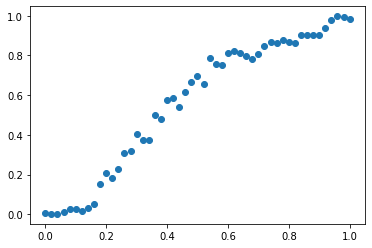

In [92]:
k = 0
wprob = np.zeros(len(x))
for eos in EOS:
    y = data['P_NS('+eos+')'].values
    pred = random_forest_regression(x, y, 100, 'squared_error')
    wprob = wprob + pred*BayesFactor[k]
    k = k + 1
wprob = wprob/sum(BayesFactor)
plt.scatter(x,wprob)
plt.show()

In [94]:
print(wprob[0],wprob[-1])

0.006091947168408822 0.9859609357700349


Not high enough at 1. We need to hardcode a constraint

# STUDY NN REGRESSION

In [16]:
x = data['X1+X2'].values; y = data['P_NS(APR4_EPP)'].values

In [117]:
def custom_activation(x):
    return np.minimum(1.0, np.maximum(0.0, x))

def neural_network_regression(x, y):
    x=x.reshape(-1, 1)
    # Train the neural network regressor
    regressor = MLPRegressor(random_state=42)
    # Add custom activation function to enforce constraints
    #regressor.out_activation_ = 'sigmoid'
    regressor.fit(x, y)
    # Scale the smoothed values back to the original range
    y_smoothed = regressor.predict(x)
    y_smoothed = custom_activation(y_smoothed)
    return y_smoothed

def neural_network_regression_without(x, y):
    x=x.reshape(-1, 1)
    # Train the neural network regressor
    regressor = MLPRegressor(random_state=42)
    # Add custom activation function to enforce constraints
    regressor.fit(x, y)
    # Scale the smoothed values back to the original range
    y_smoothed = regressor.predict(x)

    return y_smoothed

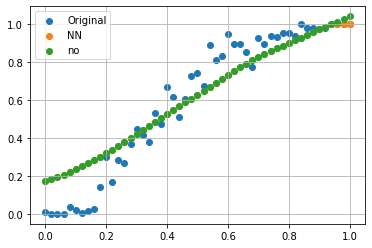

In [118]:
smoothed_nn = neural_network_regression(x, y)
smoothed_nn_no = neural_network_regression_without(x, y)
plt.scatter(x,y,label='Original')
plt.scatter(x, smoothed_nn, label='NN')
plt.scatter(x, smoothed_nn_no, label='no')
plt.legend()
plt.grid()
plt.show()

Scikitlearn is not powerful enough. Let's go for hardcore stuff

In [120]:
!pip install tensorflow

     |████████████████████████████████| 585.9 MB 1.9 kB/s  eta 0:00:01     |██████████▎                     | 187.8 MB 42.2 MB/s eta 0:00:10     |████████████████████▋           | 377.9 MB 52.8 MB/s eta 0:00:04     |█████████████████████▏          | 387.8 MB 52.8 MB/s eta 0:00:04     |██████████████████████▍         | 409.2 MB 508 kB/s eta 0:05:48     |█████████████████████████       | 458.0 MB 70.3 MB/s eta 0:00:02     |███████████████████████████████▏| 569.8 MB 26.7 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 46.6 MB/s eta 0:00:01
     |████████████████████████████████| 81 kB 2.2 MB/s  eta 0:00:01
     |████████████████████████████████| 304 kB 43.4 MB/s eta 0:00:01
     |████████████████████████████████| 5.6 MB 48.6 MB/s eta 0:00:01     |███████████████████████▉        | 4.2 MB 48.6 MB/s eta 0:00:01
     |████████████████████████████████| 22.9 MB 11 kB/s s eta 0:00:01     |███████████████                 | 10.7 MB 48.7 MB/s eta 0:00:01
     |██████████████████████

In [126]:
import tensorflow as tf

def custom_activation(x):
    return tf.minimum(1.0, tf.maximum(0.0, x))

def neural_network_regression(x, y, act):
    x=x.reshape(-1, 1)
    # Create a TensorFlow neural network model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(1, activation=act)
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(x, y, epochs=100)

    y_smoothed = model.predict(x)

    return y_smoothed



Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 0.5561
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 0.5261
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 0.4947
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 0.4638
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 0.4357
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 0.4093
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 0.3820
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3557
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 0.3323
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 0.3094
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - loss: 0.2874
Epoch 12/100
2/2 [==============================] - 0s 6ms/step - loss: 0.2665
Epoch 13/100
2/2 [==============================] - 0s 3ms/s

2/2 [==============================] - 0s 3ms/step - loss: 0.2514
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2424
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 0.2348
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2289
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 0.2228
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2182
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 0.2147
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2111
Epoch 12/100
2/2 [==============================] - 0s 4ms/step - loss: 0.2079
Epoch 13/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2052
Epoch 14/100
2/2 [==============================] - 0s 5ms/step - loss: 0.2024
Epoch 15/100
2/2 [==============================] - 0s 4ms/step - loss: 0.1995
Epoch 16/100
2/2 [==============================] - 0s 5ms/step - loss

2/2 [==============================] - 0s 3ms/step - loss: 0.3721
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 0.3542
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3355
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 0.3179
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2988
Epoch 12/100
2/2 [==============================] - 0s 5ms/step - loss: 0.2805
Epoch 13/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2629
Epoch 14/100
2/2 [==============================] - 0s 4ms/step - loss: 0.2455
Epoch 15/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2274
Epoch 16/100
2/2 [==============================] - 0s 4ms/step - loss: 0.2103
Epoch 17/100
2/2 [==============================] - 0s 6ms/step - loss: 0.1934
Epoch 18/100
2/2 [==============================] - 0s 3ms/step - loss: 0.1767
Epoch 19/100
2/2 [==============================] - 0s 5ms/step - l

2/2 [==============================] - 0s 4ms/step - loss: 0.1277
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - loss: 0.1262
Epoch 12/100
2/2 [==============================] - 0s 4ms/step - loss: 0.1250
Epoch 13/100
2/2 [==============================] - 0s 5ms/step - loss: 0.1237
Epoch 14/100
2/2 [==============================] - 0s 4ms/step - loss: 0.1224
Epoch 15/100
2/2 [==============================] - 0s 7ms/step - loss: 0.1211
Epoch 16/100
2/2 [==============================] - 0s 4ms/step - loss: 0.1199
Epoch 17/100
2/2 [==============================] - 0s 5ms/step - loss: 0.1189
Epoch 18/100
2/2 [==============================] - 0s 7ms/step - loss: 0.1177
Epoch 19/100
2/2 [==============================] - 0s 4ms/step - loss: 0.1168
Epoch 20/100
2/2 [==============================] - 0s 7ms/step - loss: 0.1156
Epoch 21/100
2/2 [==============================] - 0s 6ms/step - loss: 0.1148
Epoch 22/100
2/2 [==============================] - 0s 4ms/step -

2/2 [==============================] - 0s 3ms/step - loss: 0.0688
Epoch 14/100
2/2 [==============================] - 0s 11ms/step - loss: 0.0600
Epoch 15/100
2/2 [==============================] - 0s 5ms/step - loss: 0.0520
Epoch 16/100
2/2 [==============================] - 0s 4ms/step - loss: 0.0457
Epoch 17/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0408
Epoch 18/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0362
Epoch 19/100
2/2 [==============================] - 0s 4ms/step - loss: 0.0331
Epoch 20/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0310
Epoch 21/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0290
Epoch 22/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0275
Epoch 23/100
2/2 [==============================] - 0s 5ms/step - loss: 0.0268
Epoch 24/100
2/2 [==============================] - 0s 4ms/step - loss: 0.0263
Epoch 25/100
2/2 [==============================] - 0s 5ms/step 

2/2 [==============================] - 0s 3ms/step - loss: 0.0696
Epoch 17/100
2/2 [==============================] - 0s 4ms/step - loss: 0.0608
Epoch 18/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0543
Epoch 19/100
2/2 [==============================] - 0s 6ms/step - loss: 0.0479
Epoch 20/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0428
Epoch 21/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0387
Epoch 22/100
2/2 [==============================] - 0s 4ms/step - loss: 0.0360
Epoch 23/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0329
Epoch 24/100
2/2 [==============================] - 0s 4ms/step - loss: 0.0313
Epoch 25/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0295
Epoch 26/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0288
Epoch 27/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0279
Epoch 28/100
2/2 [==============================] - 0s 4ms/step -

2/2 [==============================] - 0s 3ms/step - loss: 0.1239
Epoch 20/100
2/2 [==============================] - 0s 3ms/step - loss: 0.1120
Epoch 21/100
2/2 [==============================] - 0s 5ms/step - loss: 0.1037
Epoch 22/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0933
Epoch 23/100
2/2 [==============================] - 0s 4ms/step - loss: 0.0853
Epoch 24/100
2/2 [==============================] - 0s 4ms/step - loss: 0.0779
Epoch 25/100
2/2 [==============================] - 0s 4ms/step - loss: 0.0704
Epoch 26/100
2/2 [==============================] - 0s 4ms/step - loss: 0.0648
Epoch 27/100
2/2 [==============================] - 0s 5ms/step - loss: 0.0595
Epoch 28/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0557
Epoch 29/100
2/2 [==============================] - 0s 5ms/step - loss: 0.0509
Epoch 30/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0477
Epoch 31/100
2/2 [==============================] - 0s 4ms/step -

2/2 [==============================] - 0s 3ms/step - loss: 0.2899
Epoch 23/100
2/2 [==============================] - 0s 7ms/step - loss: 0.2899
Epoch 24/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2899
Epoch 25/100
2/2 [==============================] - 0s 4ms/step - loss: 0.2899
Epoch 26/100
2/2 [==============================] - 0s 5ms/step - loss: 0.2899
Epoch 27/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2899
Epoch 28/100
2/2 [==============================] - 0s 5ms/step - loss: 0.2899
Epoch 29/100
2/2 [==============================] - 0s 5ms/step - loss: 0.2899
Epoch 30/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2899
Epoch 31/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2899
Epoch 32/100
2/2 [==============================] - 0s 5ms/step - loss: 0.2899
Epoch 33/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2899
Epoch 34/100
2/2 [==============================] - 0s 3ms/step -

2/2 [==============================] - 0s 3ms/step - loss: 0.0787
Epoch 26/100
2/2 [==============================] - 0s 9ms/step - loss: 0.0752
Epoch 27/100
2/2 [==============================] - 0s 4ms/step - loss: 0.0719
Epoch 28/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0689
Epoch 29/100
2/2 [==============================] - 0s 6ms/step - loss: 0.0664
Epoch 30/100
2/2 [==============================] - 0s 6ms/step - loss: 0.0641
Epoch 31/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0620
Epoch 32/100
2/2 [==============================] - 0s 4ms/step - loss: 0.0605
Epoch 33/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0590
Epoch 34/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0575
Epoch 35/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0563
Epoch 36/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0554
Epoch 37/100
2/2 [==============================] - 0s 3ms/step -

2/2 [==============================] - 0s 3ms/step - loss: 0.0582
Epoch 29/100
2/2 [==============================] - 0s 4ms/step - loss: 0.0507
Epoch 30/100
2/2 [==============================] - 0s 4ms/step - loss: 0.0449
Epoch 31/100
2/2 [==============================] - 0s 4ms/step - loss: 0.0395
Epoch 32/100
2/2 [==============================] - 0s 4ms/step - loss: 0.0355
Epoch 33/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0317
Epoch 34/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0290
Epoch 35/100
2/2 [==============================] - 0s 8ms/step - loss: 0.0269
Epoch 36/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 37/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0245
Epoch 38/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0238
Epoch 39/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0234
Epoch 40/100
2/2 [==============================] - 0s 4ms/step -

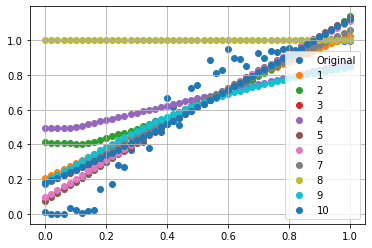

In [129]:
nn_1 = neural_network_regression(x, y, 'elu')
nn_2 = neural_network_regression(x, y, 'exponential')
nn_3 = neural_network_regression(x, y, 'gelu')
nn_4 = neural_network_regression(x, y, 'hard_sigmoid')
nn_5 = neural_network_regression(x, y, 'linear')
nn_6 = neural_network_regression(x, y, 'relu')
nn_7 = neural_network_regression(x, y, 'selu')
nn_8 = neural_network_regression(x, y, 'softmax')
nn_9 = neural_network_regression(x, y, 'tanh')
nn_10 = neural_network_regression(x, y, 'swish')

plt.scatter(x,y,label='Original')
plt.scatter(x, nn_1, label='1')
plt.scatter(x, nn_2, label='2')
plt.scatter(x, nn_3, label='3')
plt.scatter(x, nn_4, label='4')
plt.scatter(x, nn_5, label='5')
plt.scatter(x, nn_6, label='6')
plt.scatter(x, nn_7, label='7')
plt.scatter(x, nn_8, label='8')
plt.scatter(x, nn_9, label='9')
plt.scatter(x, nn_10, label='10')

plt.legend()
plt.grid()
plt.show()

This also cannot work. The constraints can make the output in an interval, but not go through points... I would say a ML regression method cannot work for this. Values at the extremes cannot be imposed.

# FIT WITH ANALYTIC FUNCTIONS

We impose (0,0), (1,1) in the equation